<a href="https://colab.research.google.com/github/shaharbanu-123/FINAL-Project/blob/main/project_26_07_2025_GRU.campared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Setup & Imports**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# CodeGrade Tag Init1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Load and Preprocess the Data**

In [5]:
# Load the csv
csv_loc = "/content/drive/MyDrive/cpcb_dly_aq_west_bengal-2010.csv"
df = pd.read_csv(csv_loc)

# Rename RSPM/PM10 column to PM10
df = df.rename(columns={'RSPM/PM10': 'PM10'})
# Rename Sampling Date to Date
df = df.rename(columns={'Sampling Date' : ' Date'})

df.head()



,Stn Code,Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,PM10,SPM
0,386,1/1/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,10.0,80.1,252.000000,525.0
1,386,1/3/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,10.6,84.1,248.000000,516.0
2,386,1/8/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.8,85.2,253.666667,527.0
3,386,1/12/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.2,77.6,255.333333,521.0
4,386,14-01-10,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.7,84.8,241.666667,511.0


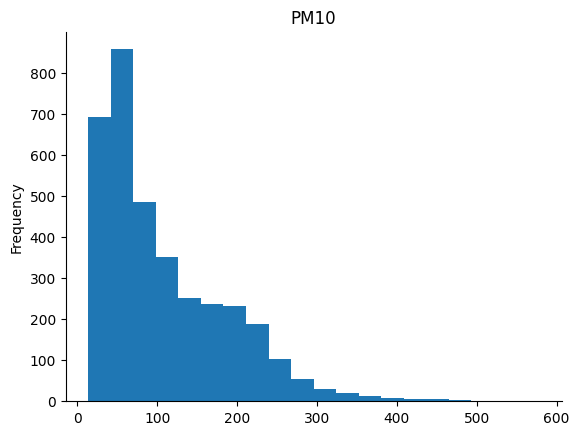

In [6]:
# @title PM10

from matplotlib import pyplot as plt
df['PM10'].plot(kind='hist', bins=20, title='PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

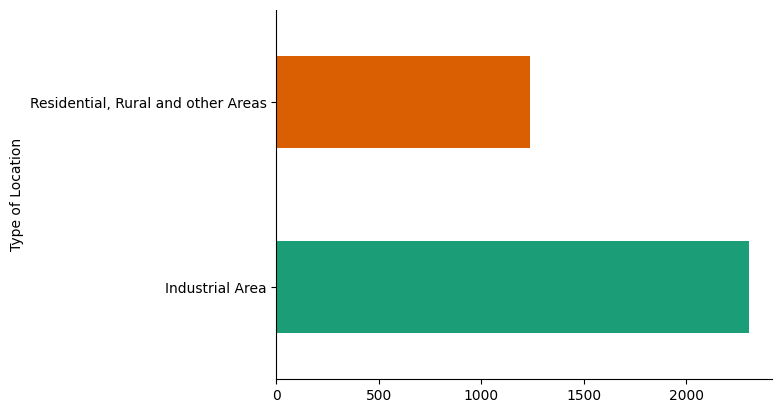

In [7]:
# @title Type of Location

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Type of Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

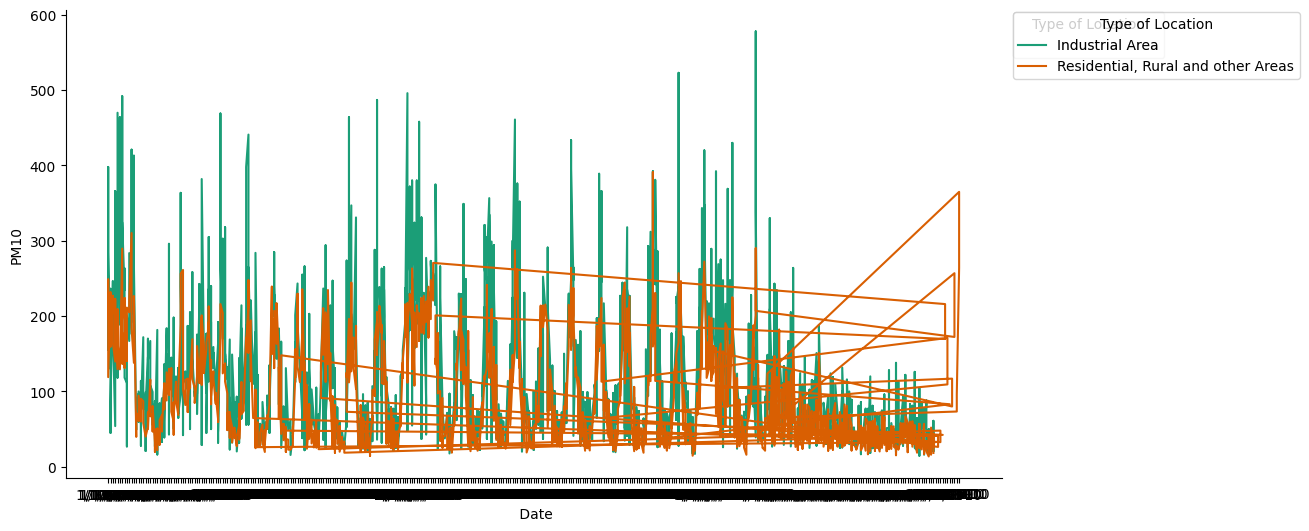

In [8]:
# @title  Date vs PM10

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Date']
  ys = series['PM10']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values(' Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Type of Location')):
  _plot_series(series, series_name, i)
  fig.legend(title='Type of Location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Date')
_ = plt.ylabel('PM10')

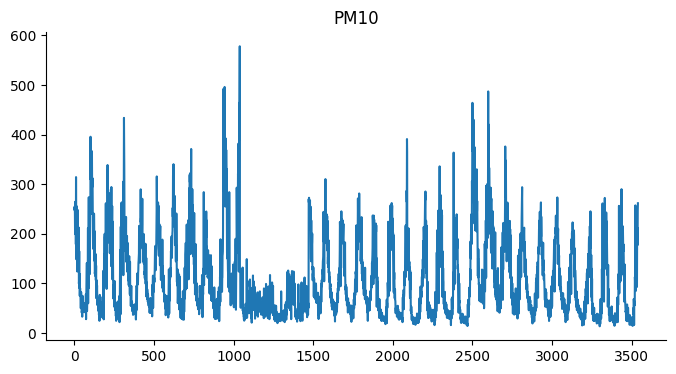

In [9]:
# @title PM10

from matplotlib import pyplot as plt
df['PM10'].plot(kind='line', figsize=(8, 4), title='PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

/tmp/ipython-input-2733122853.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='PM10', y='Type of Location', inner='box', palette='Dark2')


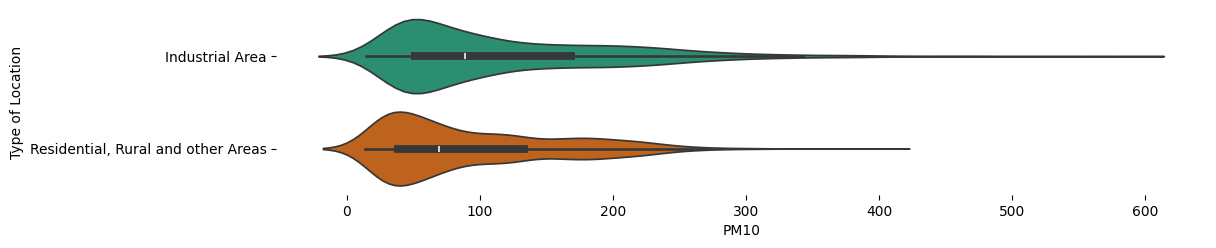

In [10]:
# @title Type of Location vs PM10

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Type of Location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='PM10', y='Type of Location', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [11]:
# Parse date column and sort
df[' Date'] = pd.to_datetime(df[' Date'], format='mixed', dayfirst=True, errors='coerce')

df = df.sort_values(' Date')

# Filter PM2.5 values for a selected location
city_df = df[df['City/Town/Village/Area'] == 'Kolkata'][[' Date', 'PM10']].dropna()

# Resample daily average if needed
city_df = city_df.set_index( ' Date').resample('D').mean()

df.head()
city_df.head()

,PM10
Date,
2010-01-01,155.000000
2010-01-02,193.833333
2010-01-03,133.000000
2010-01-04,76.333333
2010-01-05,30.666667


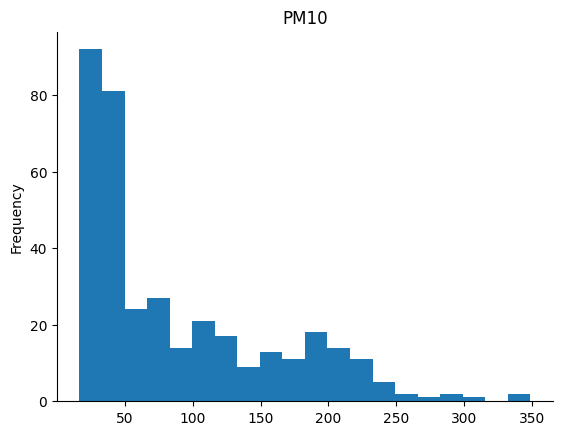

In [12]:
# @title PM10

from matplotlib import pyplot as plt
city_df['PM10'].plot(kind='hist', bins=20, title='PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

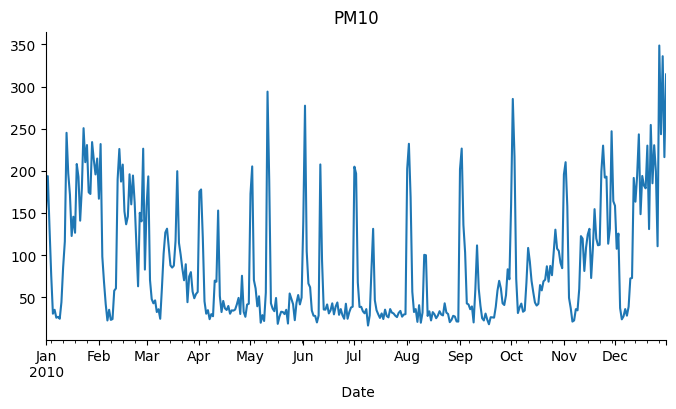

In [13]:
# @title PM10

from matplotlib import pyplot as plt
city_df['PM10'].plot(kind='line', figsize=(8, 4), title='PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

# **3.Heat Map for Daily PM10 Levels in Kolkata**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extract month for grouping
df['Day'] = df[' Date'].dt.day
df['Month'] = df[' Date'].dt.strftime('%b')
df['Month_Num'] = df[' Date'].dt.month  # to sort months later


In [15]:
# Group by month and day, then get average PM10
pivot_df = df.groupby(['Month_Num', 'Month', 'Day'])['PM10'].mean().reset_index()

# Pivot table: rows = day, columns = month
heatmap_data = pivot_df.pivot(index='Day', columns='Month', values='PM10')

# Sort months in calendar order
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
heatmap_data = heatmap_data[month_order]


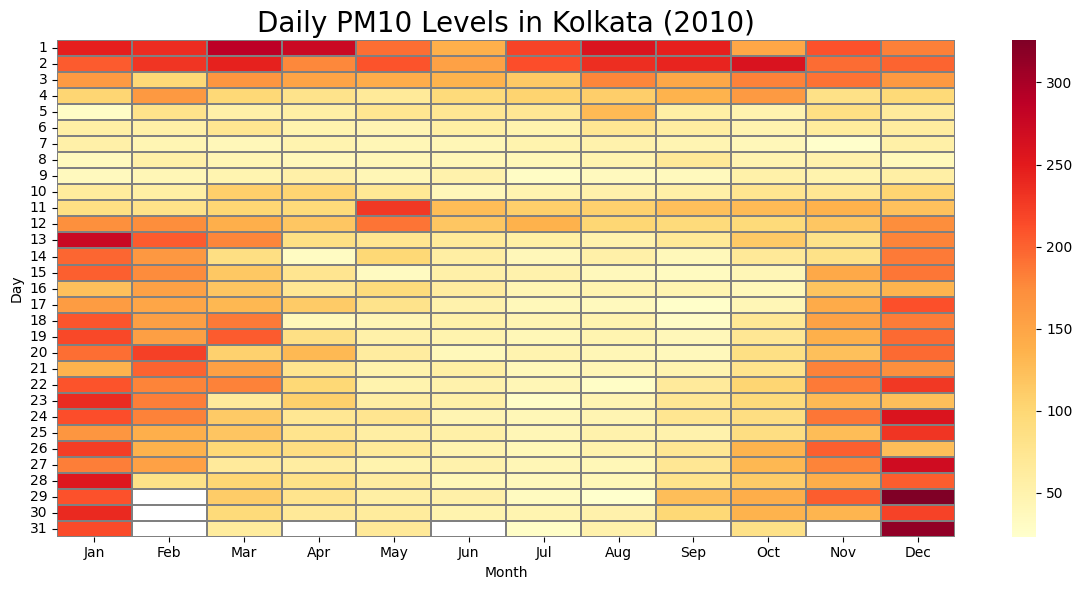

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.3, linecolor='gray', annot=False)
plt.title('Daily PM10 Levels in Kolkata (2010)', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Day')
plt.tight_layout()
plt.show()



# **4. IMPLEMENTATION OF MODELS**

## **1.Scale Data**

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Scaling PM10 values
scaler = MinMaxScaler()
city_df['PM10_scaled'] = scaler.fit_transform(city_df[['PM10']])

## **2.Create sequences**

In [18]:
# Creating Sequences for Supervised Learning
def create_sequences(data, lookback=30):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

import numpy as np
pm10_values = city_df['PM10_scaled'].values
X, y = create_sequences(pm10_values, lookback=30)

## **3.Train-test split**

In [19]:
# Split into Train-Test (e.g., 80-20 split)
split = -50
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f'Training samples: {X_train.shape[0]} | Test samples: {X_test.shape[0]}')

Training samples: 285 | Test samples: 50


# **4.LSTM Forcasting**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0473 - val_loss: 0.1294
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0446 - val_loss: 0.0653
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0286 - val_loss: 0.0731
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0326 - val_loss: 0.0747
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0327 - val_loss: 0.0712
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0262 - val_loss: 0.0672
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0249 - val_loss: 0.0615
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0250 - val_loss: 0.0676
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0234 - val_loss: 0.0595
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0255 - val_loss: 0.0616
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0230 - val_loss: 0.0643
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0223 - val_loss: 0.0576
Epoch 13/50


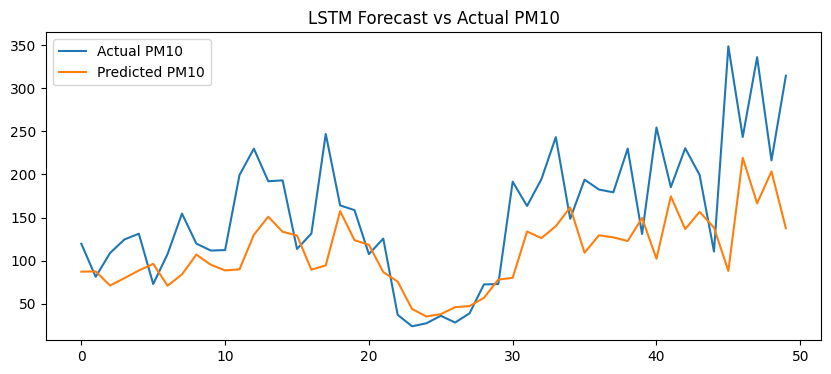

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reshape input for LSTM: (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test_lstm, y_test), verbose=1)

# Predict
y_pred_scaled = model.predict(X_test_lstm).flatten()

# Inverse Scale to get original PM10 values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_actual = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Optional: Plot Actual vs. Predicted
plt.figure(figsize=(10,4))
plt.plot(y_test_actual, label='Actual PM10')
plt.plot(y_pred_actual, label='Predicted PM10')
plt.legend()
plt.title('LSTM Forecast vs Actual PM10')
plt.show()


## **5. Function to evaluate LSTM**

In [35]:
def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mape = (np.abs((y_true - y_pred) / y_true)).mean() * 100
    r2 = r2_score(y_true, y_pred)
    accuracy = 100 - mape

    print('--- Evaluation Metrics ---')
    print(f'MAE    : {mae:.3f}')
    print(f'MSE    : {mse:.3f}')
    print(f'RMSE   : {rmse:.3f}')
    print(f'MAPE   : {mape:.3f}%')
    print(f'R²     : {r2:.3f}')
    print(f'Forecasting Accuracy : {accuracy:.3f}%')

    return mae, mse, rmse, mape, r2, accuracy


## **6.Residual of LSTM**

In [36]:
#Plot Residual
def plot_residuals(true, pred, label=''):
    residuals = true.flatten() - pred.flatten()
    plt.figure(figsize=(10, 4))
    plt.plot(residuals, label=f'{label} Residuals')
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f'Residual Plot - {label}')
    plt.legend()
    plt.show()

## **7.Evaluation of LSTM**

--- Evaluation Metrics ---
MAE    : 53.729
MSE    : 5775.240
RMSE   : 75.995
MAPE   : 32.596%
R²     : 0.039
Forecasting Accuracy : 67.404%


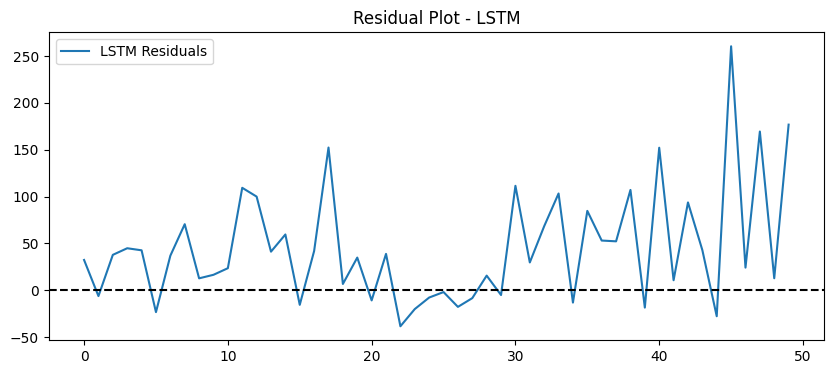

In [37]:
# Evaluate Model

lstm_mae, lstm_mse, lstm_rmse, lstm_mape, lstm_r2, lstm_accuracy = evaluate_forecast(y_test_actual, y_pred_actual)
plot_residuals(y_test_actual, y_pred_actual, label='LSTM')


# **8.CNN Forcasting**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0388
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114
Epoch 16/50
18/18 ━━━━━━━━━━━━

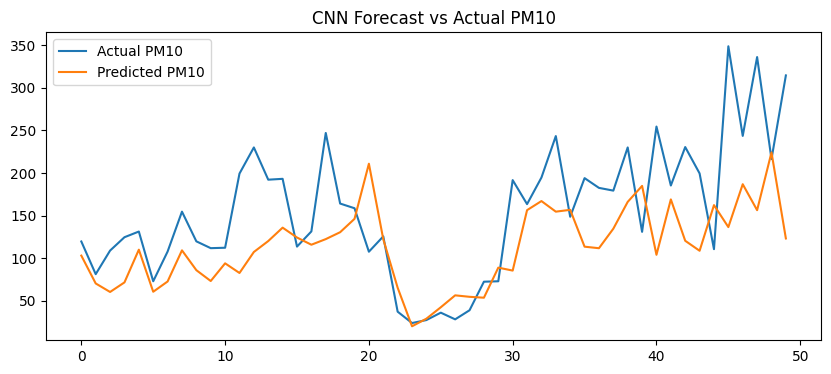

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Reshape input for CNN: (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(30, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model_cnn.compile(optimizer='adam', loss='mse')
model_cnn.fit(X_train_lstm, y_train, epochs=50, batch_size=16, verbose=1)

# Predict
pred_cnn = model_cnn.predict(X_test_lstm)

# Inverse Scale to get original PM10 values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_actual = scaler.inverse_transform(pred_cnn.reshape(-1, 1)).flatten()

# Optional: Plot Actual vs. Predicted
plt.figure(figsize=(10,4))
plt.plot(y_test_actual, label='Actual PM10')
plt.plot(y_pred_actual, label='Predicted PM10')
plt.legend()
plt.title('CNN Forecast vs Actual PM10')
plt.show()




## **9.Function to evaluate CNN**

In [47]:
def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mape = (np.abs((y_true - y_pred) / y_true)).mean() * 100
    r2 = r2_score(y_true, y_pred)
    accuracy = 100 - mape

    print('--- Evaluation Metrics ---')
    print(f'MAE    : {mae:.3f}')
    print(f'MSE    : {mse:.3f}')
    print(f'RMSE   : {rmse:.3f}')
    print(f'MAPE   : {mape:.3f}%')
    print(f'R²     : {r2:.3f}')
    print(f'Forecasting Accuracy : {accuracy:.3f}%')

    return mae, mse, rmse, mape, r2, accuracy

## **10.Residual of CNN**

In [48]:
#Plot Residual
def plot_residuals(true, pred, label=''):
    residuals = true.flatten() - pred.flatten()
    plt.figure(figsize=(10, 4))
    plt.plot(residuals, label=f'{label} Residuals')
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f'Residual Plot - {label}')
    plt.legend()
    plt.show()

## **11.Evaluation of CNN**

--- Evaluation Metrics ---
MAE    : 49.580
MSE    : 4635.980
RMSE   : 68.088
MAPE   : 35.623%
R²     : 0.229
Forecasting Accuracy : 64.377%


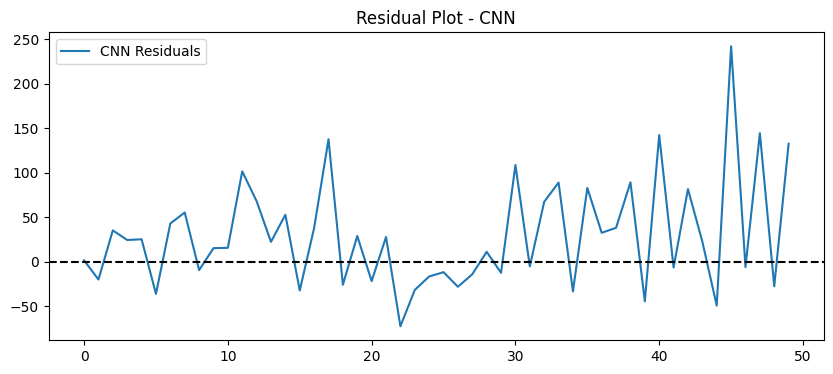

In [49]:
# Evaluate CNN
cnn_mae, cnn_mse, cnn_rmse, cnn_mape, cnn_r2, cnn_accuracy = evaluate_forecast(y_test_actual, y_pred_actual)
plot_residuals(y_test_actual, y_pred_actual, label='CNN')



## **12. GRU Forcasting**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0458
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0323
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0238
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0175
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0207
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0242
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0207
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0217
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0198
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0173
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0183
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0264
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0223
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0175
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0207
Epoch 16/50
18/

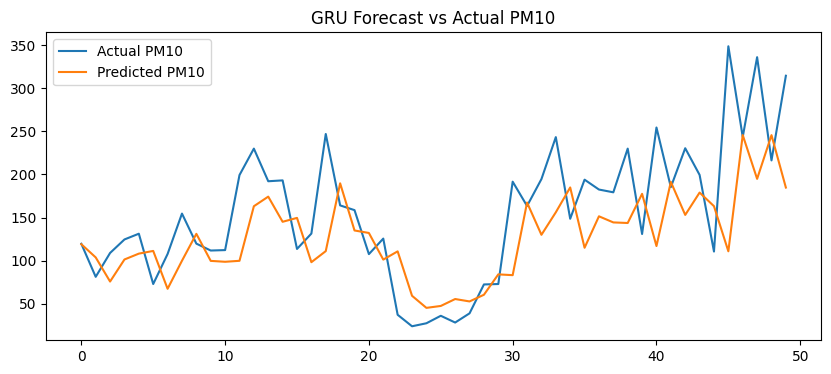

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reshape input for GRU: (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#GRU-Model building
model_gru = Sequential([
    GRU(64, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_train_lstm, y_train, epochs=50, batch_size=16, verbose=1)

pred_gru = model_gru.predict(X_test_lstm).flatten()

# Inverse Scale to get original PM10 values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_actual = scaler.inverse_transform(pred_gru.reshape(-1, 1)).flatten()

# Optional: Plot Actual vs. Predicted
plt.figure(figsize=(10,4))
plt.plot(y_test_actual, label='Actual PM10')
plt.plot(y_pred_actual, label='Predicted PM10')
plt.legend()
plt.title('GRU Forecast vs Actual PM10')
plt.show()

## **13.Function to Evaluate GRU**

In [52]:

def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mape = (np.abs((y_true - y_pred) / y_true)).mean() * 100
    r2 = r2_score(y_true, y_pred)
    accuracy = 100 - mape

    print('--- Evaluation Metrics ---')
    print(f'MAE    : {mae:.3f}')
    print(f'MSE    : {mse:.3f}')
    print(f'RMSE   : {rmse:.3f}')
    print(f'MAPE   : {mape:.3f}%')
    print(f'R²     : {r2:.3f}')
    print(f'Forecasting Accuracy : {accuracy:.3f}%')

    return mae, mse, rmse, mape, r2, accuracy

## **14.Residual of GRU**

In [53]:
#Plot Residual
def plot_residuals(true, pred, label=''):
    residuals = true.flatten() - pred.flatten()
    plt.figure(figsize=(10, 4))
    plt.plot(residuals, label=f'{label} Residuals')
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f'Residual Plot - {label}')
    plt.legend()
    plt.show()

## **15.Evaluation of GRU**

--- Evaluation Metrics ---
MAE    : 48.449
MSE    : 4456.550
RMSE   : 66.757
MAPE   : 35.424%
R²     : 0.259
Forecasting Accuracy : 64.576%


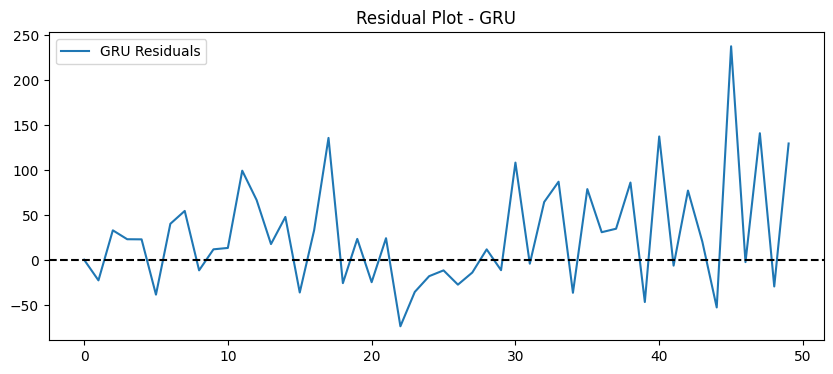

In [54]:
#Evaluate GRU

gru_mae, gru_mse, gru_rmse, gru_mape, gru_r2, gru_accuracy = evaluate_forecast(y_test_actual, y_pred_actual)
plot_residuals(y_test_actual, y_pred_actual, label='GRU')

# **5.Accuracy Comparison Table**

In [55]:
import pandas as pd

# Base metrics table
metrics_df = pd.DataFrame({
    'Model': ['LSTM', 'CNN', 'GRU'],
    'RMSE': [lstm_rmse, cnn_rmse, gru_rmse],
    'MAE': [lstm_mae, cnn_mae, gru_mae],
    'MAPE (%)': [lstm_mape, cnn_mape, gru_mape],
    'R²': [lstm_r2, cnn_r2, gru_r2],
    'Forecast Accuracy (%)': [lstm_accuracy, cnn_accuracy, gru_accuracy]
})

# Rank metrics (lower is better for errors, higher is better for R² & Accuracy)

metrics_df['Rank_Accuracy'] = metrics_df['Forecast Accuracy (%)'].rank(ascending=False)

# Average Rank
metrics_df['Average Rank'] = metrics_df[[
    'Rank_Accuracy'
]].mean(axis=1)

# Sort by Average Rank (best model at the top)
metrics_df = metrics_df.sort_values('Average Rank')

# Set model as index
metrics_df.set_index('Model', inplace=True)

# Format + style
styled_table = metrics_df.style\
    .background_gradient(cmap='coolwarm_r')\
    .format({
        'RMSE': "{:.2f}",
        'MAE': "{:.2f}",
        'MAPE (%)': "{:.2f}",
        'R²': "{:.3f}",
        'Forecast Accuracy (%)': "{:.2f}",
        'Average Rank': "{:.2f}"
    })

styled_table


,RMSE,MAE,MAPE (%),R²,Forecast Accuracy (%),Rank_Accuracy,Average Rank
Model,,,,,,,
LSTM,76.00,53.73,32.60,0.039,67.40,1.000000,1.00
GRU,66.76,48.45,35.42,0.259,64.58,2.000000,2.00
CNN,68.09,49.58,35.62,0.229,64.38,3.000000,3.00
